## K-Means Clustering

In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# ubah nama kolom
df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
 
# ubah data kategorik mmenjadi data numerik
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
 
# tampilkan data yang sudah di preprocess
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


In [4]:
from sklearn.cluster import KMeans
 
# menghilangkan kolom customer id dan gender
X = df.drop(['CustomerID'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

C:\Users\aurel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Inertia')

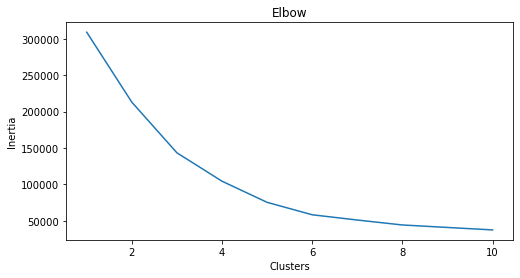

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### membuat plot inertia sehingga dapat melihat Elbow
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1,11)), y = clusters, ax= ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


## Didapatkanlah Elbow yakni 5


C:\Users\aurel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


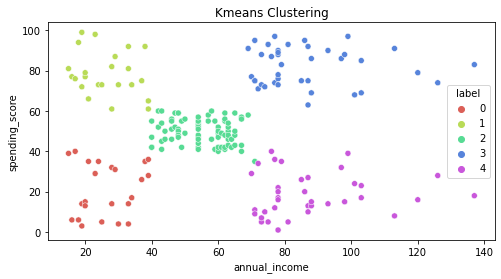

In [6]:
### Membuat objek KMeans

kms = KMeans(n_clusters=5).fit(X)

## Menambahkan kolom label pada dataset
X['label']=kms.labels_

## Membuat plot KMeans
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['label'],
                palette=sns.color_palette('hls', 5))
plt.title('Kmeans Clustering')
plt.show()

## PCA 

In [7]:
import pandas as pd

iris = pd.read_csv("D:\TUGAS\AI\Iris.csv")

In [8]:
from sklearn.model_selection import train_test_split

iris.drop('Id',axis=1,inplace=True)

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm']

x = iris[feature]
y = iris.Species

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

In [9]:
from sklearn import tree
 
decision_tree = tree.DecisionTreeClassifier()
model_pertama = decision_tree.fit(x_train, y_train)
model_pertama.score(x_test, y_test)

0.9666666666666667

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

## Memasukkan PCA kepada dataset

pca_attributes = pca.fit_transform(x_train)

## Melihat variance atribut

pca.explained_variance_ratio_

array([9.54779138e-01, 3.66579644e-02, 8.56289776e-03, 4.78901801e-34])

In [11]:
# PCA dengan 2 principal component
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.fit_transform(x_test)

In [12]:
# uji akurasi classifier
model2 = decision_tree.fit(X_train_pca, y_train)
model2.score(X_test_pca, y_test)

0.8666666666666667